In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

num_days = 100

data = []
start_date = datetime(2023, 2, 1)  
for day in range(num_days):
    current_date = start_date + timedelta(days=day)
    
    temperature = round(random.uniform(13, 39), 2)
    
    # Generate random day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
    day_of_week = random.randint(0, 6)
    
    time_of_day = random.randint(0, 23)
    
    # Generate random population density (assume values between 5000 to 20000 people per square kilometer)
    population_density = random.randint(5000, 20000)
    
    # Generate random household income (assume values between 20000 to 80000 USD)
    household_income = random.randint(20000, 80000)
    
    # Calculate waste generation as a combination of features
    # This is a simplified equation, and you can modify it based on the importance of each feature.
    waste_generation = (temperature + day_of_week + time_of_day + population_density + household_income) * random.uniform(0.8, 1.2)
    
    # Append the data for the day to the main data list
    data.append([current_date, temperature, day_of_week, time_of_day, population_density, household_income, waste_generation])

# Create a DataFrame from the synthetic data
columns = ['Date', 'Temperature (°C)', 'Day of Week', 'Time of Day', 'Population Density', 'Household Income', 'Waste Generation']
df_complex = pd.DataFrame(data, columns=columns)

# Save the synthetic data to a CSV file
df_complex.to_csv('complex_waste_data.csv', index=False)


In [2]:
with open("complex_waste_data.csv", "r") as data:
    sandip = data.read()
    print(sandip)

Date,Temperature (Â°C),Day of Week,Time of Day,Population Density,Household Income,Waste Generation
2023-02-01,28.43,2,17,16530,73273,95628.39678323334
2023-02-02,32.47,3,10,19220,49367,57800.298967739414
2023-02-03,32.81,0,4,7773,45463,59925.93757457685
2023-02-04,16.71,4,19,15799,20884,35801.98762931686
2023-02-05,19.1,6,5,8742,68209,86760.84863334286
2023-02-06,38.3,1,3,7818,65234,64541.12689614651
2023-02-07,16.62,3,2,17748,59465,71776.33638523292
2023-02-08,22.28,2,7,13288,65576,71904.91547099838
2023-02-09,25.14,4,11,17557,64769,80993.0029510231
2023-02-10,16.12,2,15,7365,69806,85741.60262253274
2023-02-11,25.69,3,23,11075,21696,35175.505973477106
2023-02-12,19.86,1,0,16729,51437,56793.381800393065
2023-02-13,38.3,3,15,8484,50795,53587.75509485584
2023-02-14,31.01,5,21,5999,75028,68195.84181751763
2023-02-15,32.88,3,11,12596,30167,49434.25356208795
2023-02-16,17.14,1,21,10557,25720,36026.90064280526
2023-02-17,22.45,2,5,16976,68372,72731.95598435968
2023-02-18,26.22,1,13,14845,20

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

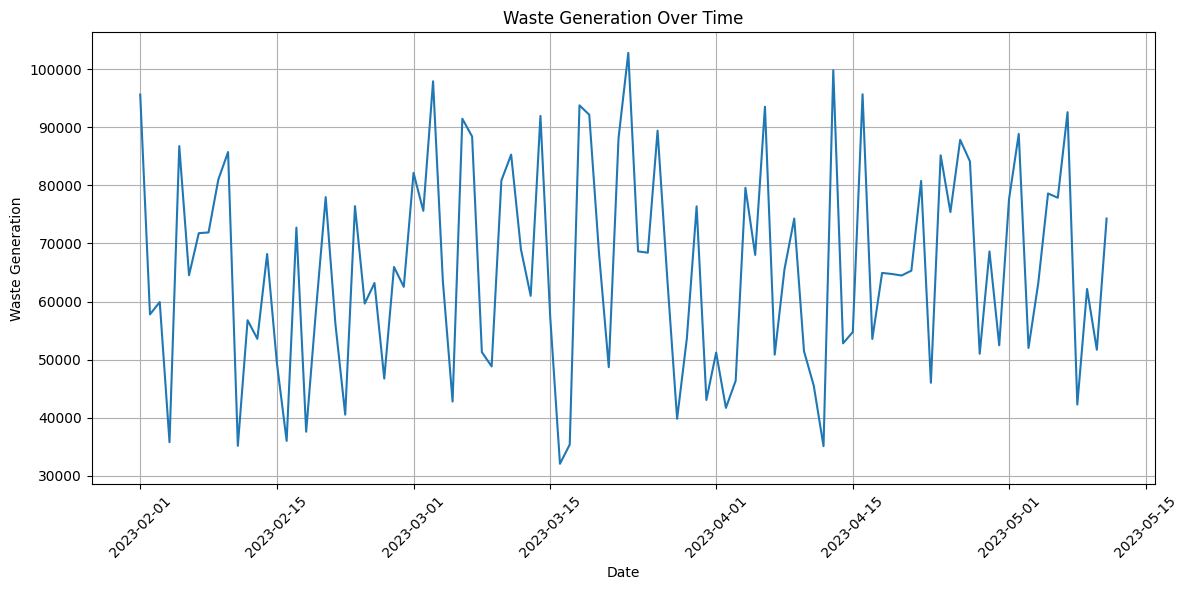

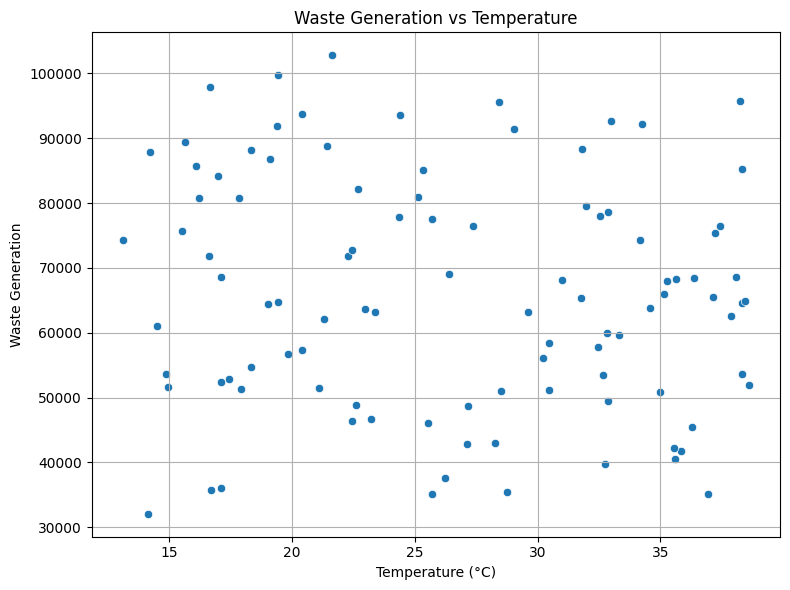

C:\Users\Sandip\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


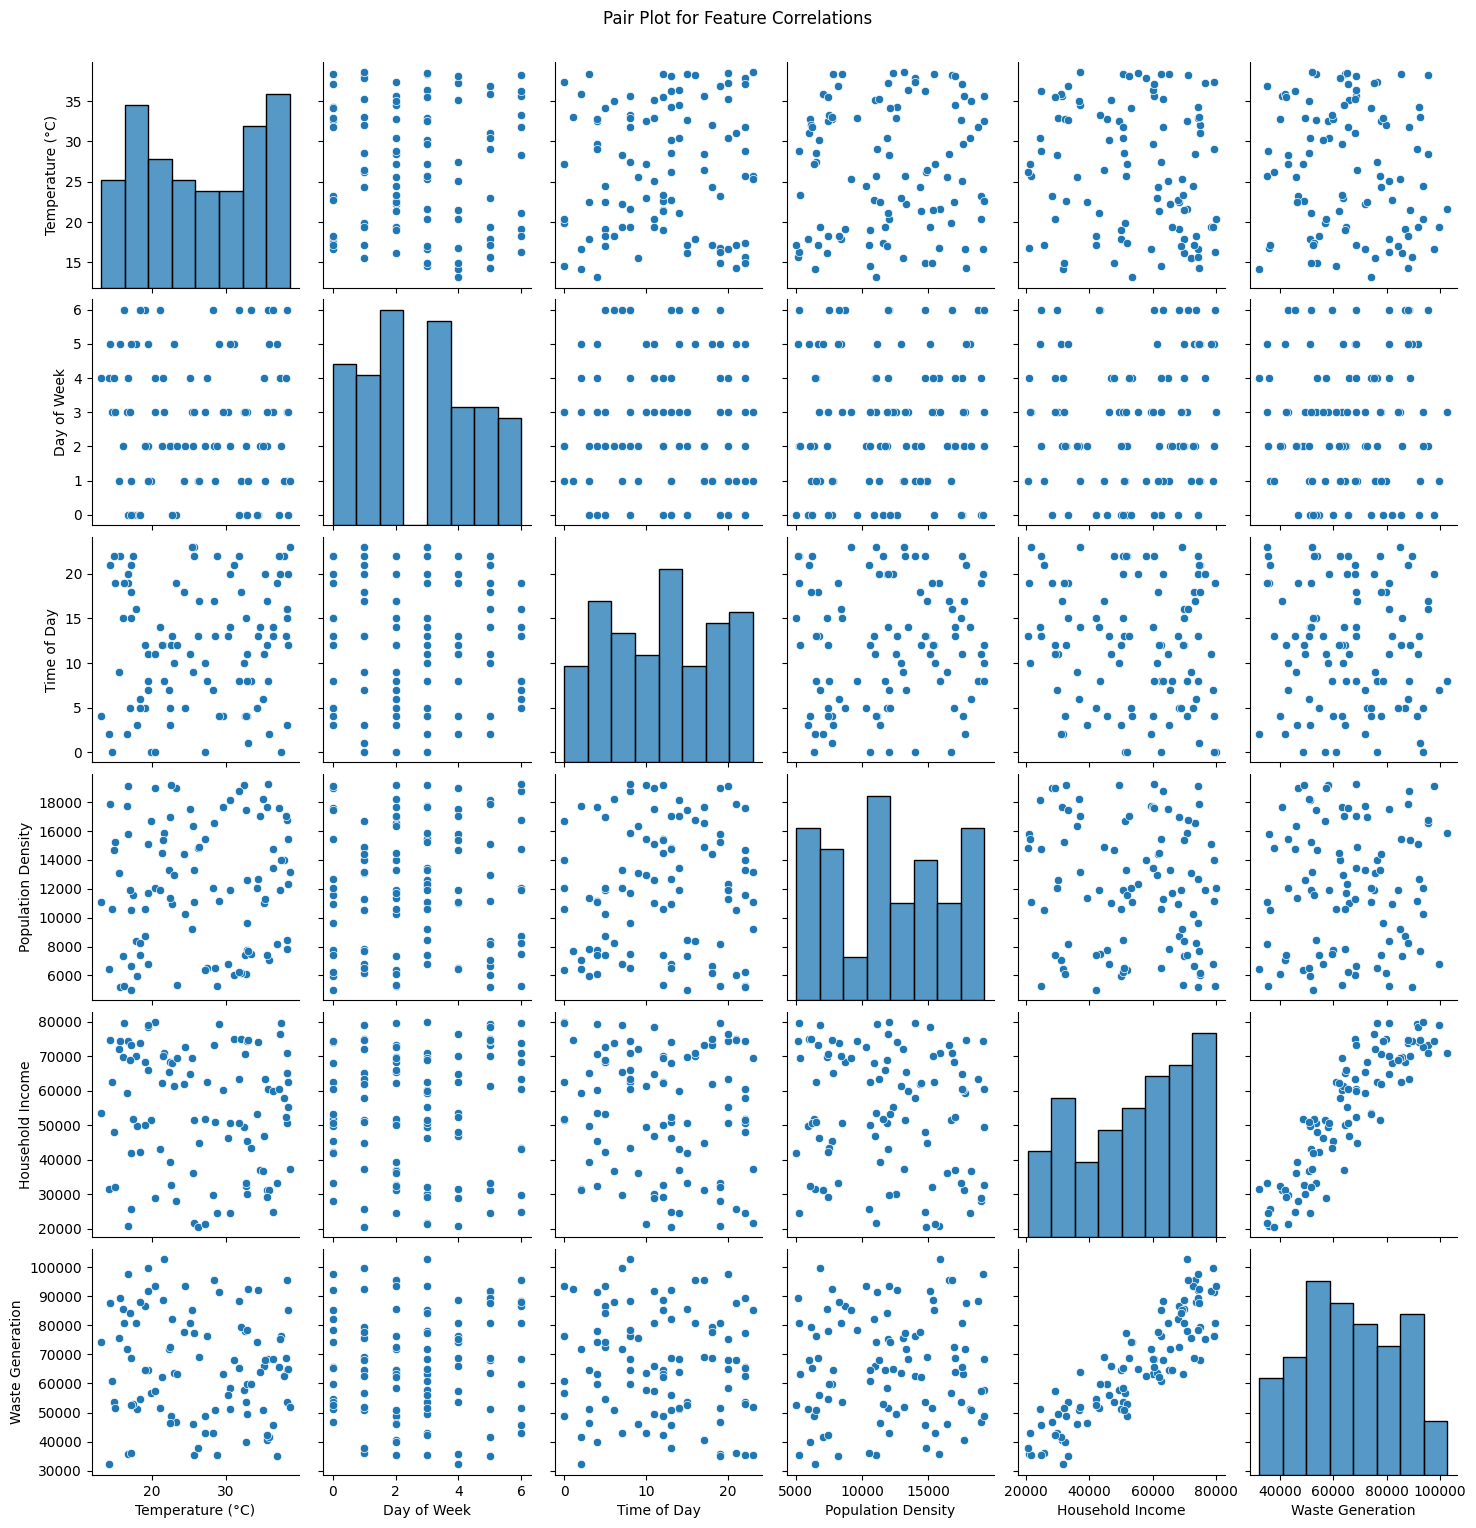

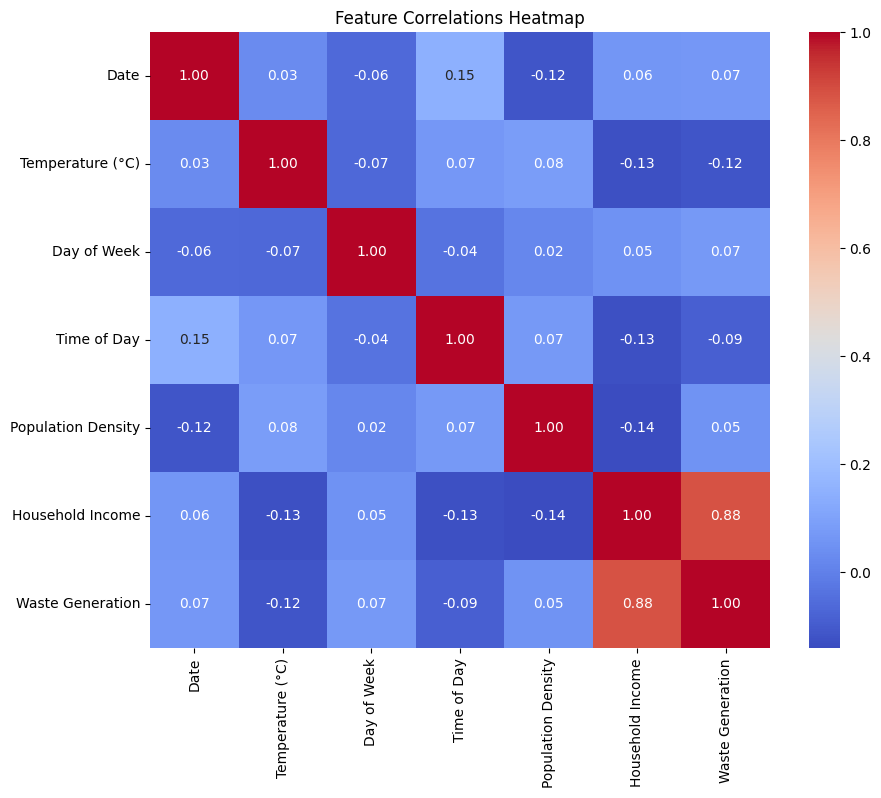

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the complex synthetic waste data from the CSV file
df_complex = pd.read_csv('complex_waste_data.csv')

# Convert the "Date" column to datetime objects
df_complex['Date'] = pd.to_datetime(df_complex['Date'])

# Data Visualization - Line Plot of Waste Generation Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Waste Generation', data=df_complex)
plt.xlabel('Date')
plt.ylabel('Waste Generation')
plt.title('Waste Generation Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Visualization - Scatter Plot of Waste Generation vs Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature (°C)', y='Waste Generation', data=df_complex)
plt.xlabel('Temperature (°C)')
plt.ylabel('Waste Generation')
plt.title('Waste Generation vs Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Visualization - Pair Plot for Feature Correlations
sns.pairplot(df_complex, vars=['Temperature (°C)', 'Day of Week', 'Time of Day', 'Population Density', 'Household Income', 'Waste Generation'])
plt.suptitle('Pair Plot for Feature Correlations', y=1.02)
plt.show()

# Data Visualization - Heatmap for Feature Correlations
correlation_matrix = df_complex.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations Heatmap')
plt.show()


In [6]:
!pip install scikit-learn

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the complex synthetic waste data from the CSV file
df_complex = pd.read_csv('complex_waste_data.csv')

# Separate features and target variable
X = df_complex[['Temperature (°C)', 'Day of Week', 'Time of Day', 'Population Density', 'Household Income']]
y = df_complex['Waste Generation']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (optional, but can improve model performance for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Predict using the model
y_pred = linear_reg.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R2:", r2)


Linear Regression MSE: 62178291.31822522
Linear Regression R2: 0.8448322972000238


In [8]:
new_data = pd.DataFrame({
    'Temperature (°C)': [25.5, 28.0, 23.8],
    'Day of Week': [2, 4, 1],
    'Time of Day': [12, 16, 9],
    'Population Density': [10000, 15000, 8000],
    'Household Income': [45000, 60000, 35000]
})

# Feature Scaling for new data (use the same scaler as used during model training)
new_data_scaled = scaler.transform(new_data)

# Predict using the model
new_predictions = linear_reg.predict(new_data_scaled)

print("Predicted Waste Generation for New Data:")
print(new_predictions)

Predicted Waste Generation for New Data:
[55726.23633269 74018.31151123 44521.08438824]


In [9]:
!pip install dash

In [10]:
import pandas as pd
import numpy as np
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the complex synthetic waste data from the CSV file
df_complex = pd.read_csv('complex_waste_data.csv')

# Separate features and target variable
X = df_complex[['Temperature (°C)', 'Day of Week', 'Time of Day', 'Population Density', 'Household Income']]
y = df_complex['Waste Generation']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_scaled, y)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Waste Management Dashboard'),
    html.Div([
        html.Label('Temperature (°C)'),
        dcc.Input(id='temperature', type='number', value=25.0),
        html.Label('Day of Week (0: Monday, 1: Tuesday, ..., 6: Sunday)'),
        dcc.Input(id='day_of_week', type='number', value=2),
        html.Label('Time of Day (0 to 23 hours)'),
        dcc.Input(id='time_of_day', type='number', value=12),
        html.Label('Population Density (people per sq. km)'),
        dcc.Input(id='population_density', type='number', value=10000),
        html.Label('Household Income (USD)'),
        dcc.Input(id='household_income', type='number', value=50000),
        html.Button('Predict Waste Generation', id='submit-button', n_clicks=0),
    ]),
    html.Div(id='prediction-output')
])

# Define the callback to update the prediction output
@app.callback(
    Output('prediction-output', 'children'),
    Input('submit-button', 'n_clicks'),
    Input('temperature', 'value'),
    Input('day_of_week', 'value'),
    Input('time_of_day', 'value'),
    Input('population_density', 'value'),
    Input('household_income', 'value')
)
def update_prediction(n_clicks, temperature, day_of_week, time_of_day, population_density, household_income):
    # Create feature array for prediction
    new_data = np.array([[temperature, day_of_week, time_of_day, population_density, household_income]])
    new_data_scaled = scaler.transform(new_data)

    # Predict using the model
    prediction = linear_reg.predict(new_data_scaled)

    return f'Predicted Waste Generation: {prediction[0]:.2f}'

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\Sandip\AppData\Local\Temp\ipykernel_13980\496883722.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Sandip\AppData\Local\Temp\ipykernel_13980\496883722.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
